In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'): #Ingresar la direccion de donde se encuentre el documento
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matriz de Correlacion Matrix de {filename}', fontsize=15)
    plt.show()

In [5]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 1000 
df1 = pd.read_csv('/home/alberto/Documentos/UAX/Curso 3/Desarrollo Orientado a Objetos/kaggle/input/Not_so_Markov_action_board_S100E1000.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Not_so_Markov_action_board_S100E1000.csv'
nRow, nCol = df1.shape
print(f'Hay {nRow} filas y {nCol} columnas')

Hay 1000 filas y 7 columnas


In [7]:
df1.head(5)

Unnamed: 0  season  episode  Markov Action  Nash Action  Markov Reward  \
0           0     0.0      1.0            0.0          2.0            1.0   
1           1     0.0      2.0            1.0          0.0            2.0   
2           2     0.0      3.0            2.0          1.0            3.0   
3           3     0.0      4.0            1.0          0.0            4.0   
4           4     0.0      5.0            1.0          1.0            4.0   

   Nash Reward  
0         -1.0  
1         -2.0  
2         -3.0  
3         -4.0  
4         -4.0

In [8]:
df1.drop(['season','episode'], axis=1,inplace=True)

In [9]:
df1.columns=['Tirada','Movimiento de Markov','Movimiento de Nash','Resultado de Markov','Resultado de Nash']

<ipython-input-3-33ffca31f1b4>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


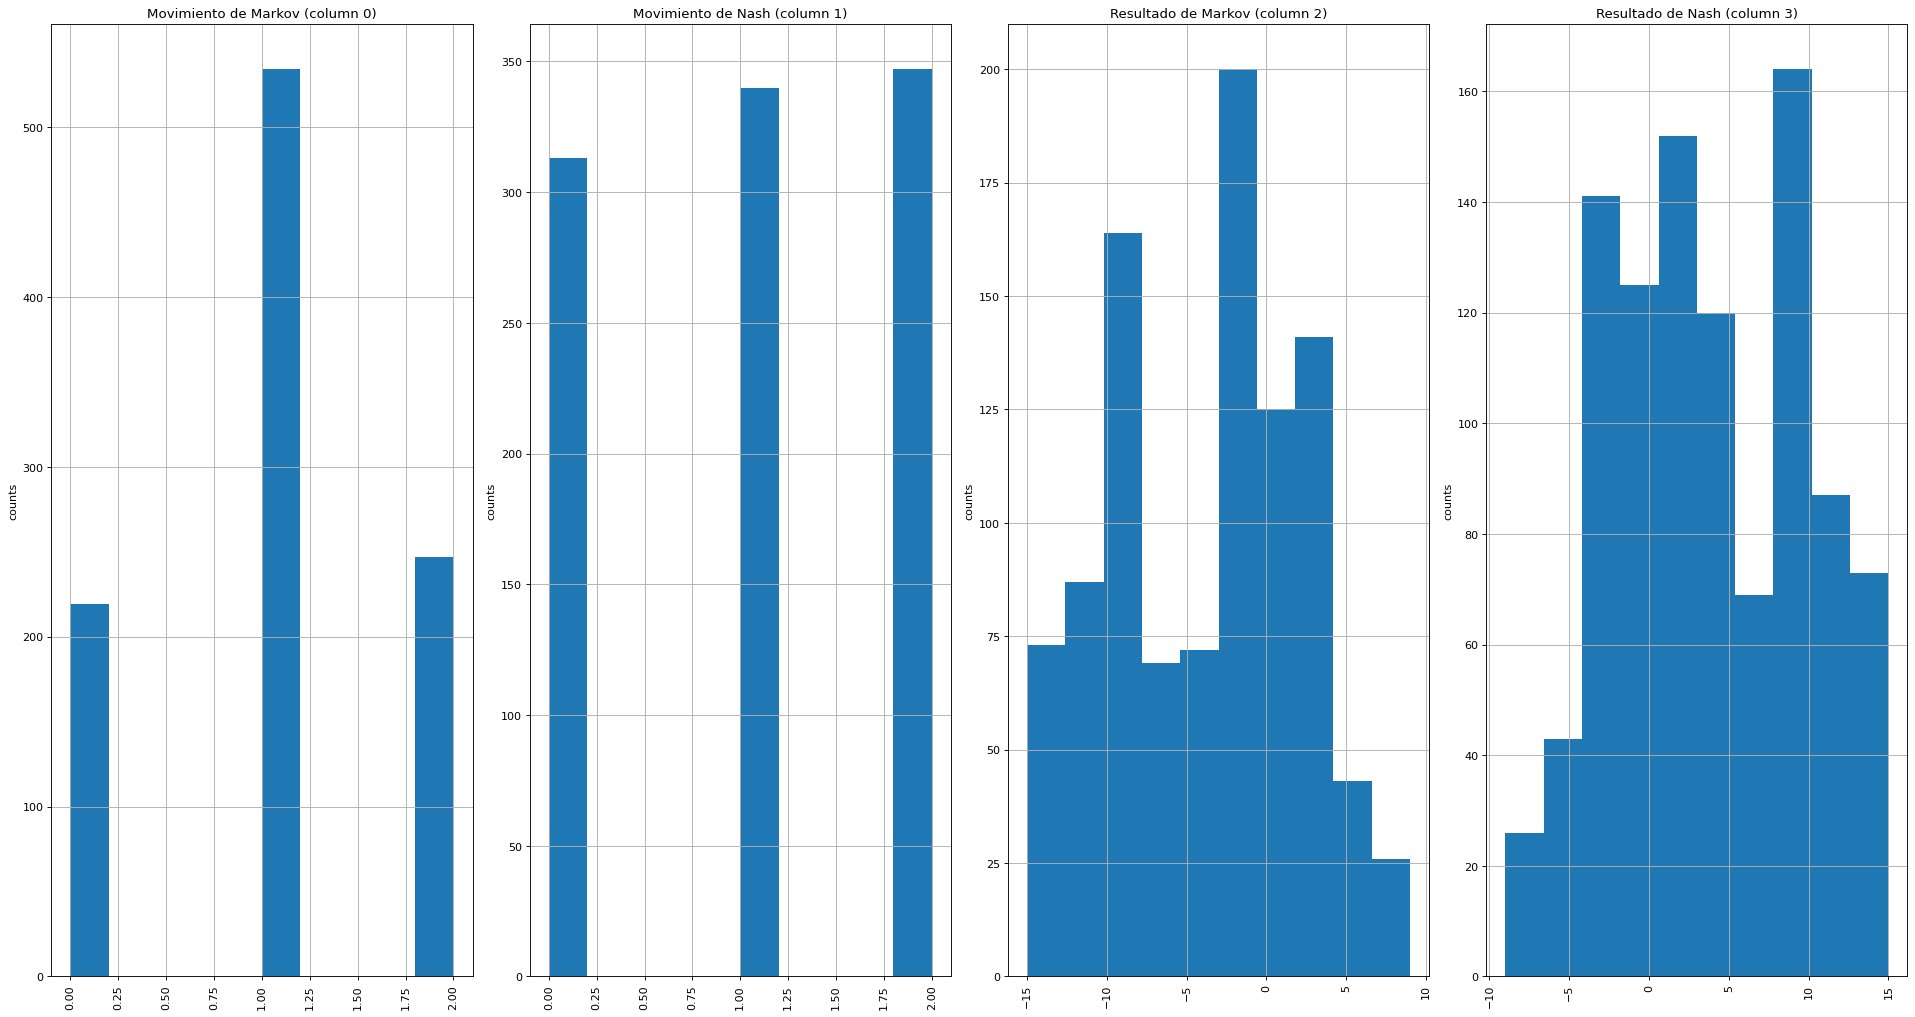

In [10]:
plotPerColumnDistribution(df1, 10, 5)

<ipython-input-4-9ab993696233>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


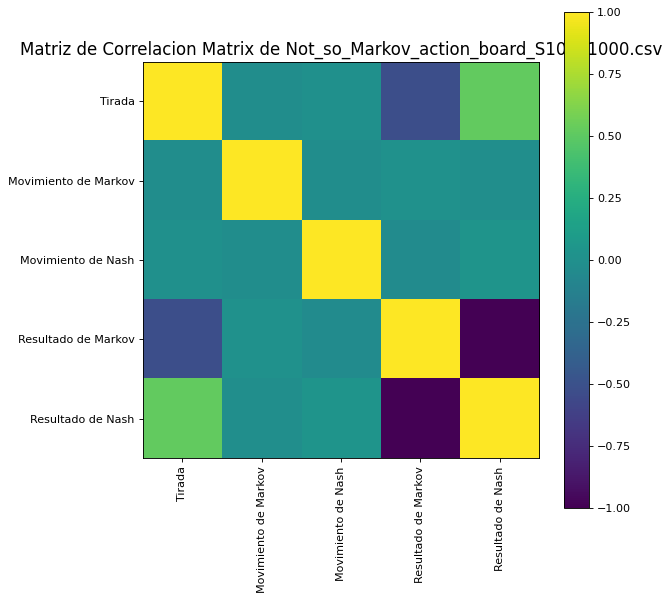

In [11]:
plotCorrelationMatrix(df1, 8)

<ipython-input-5-01147ed9ffa7>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


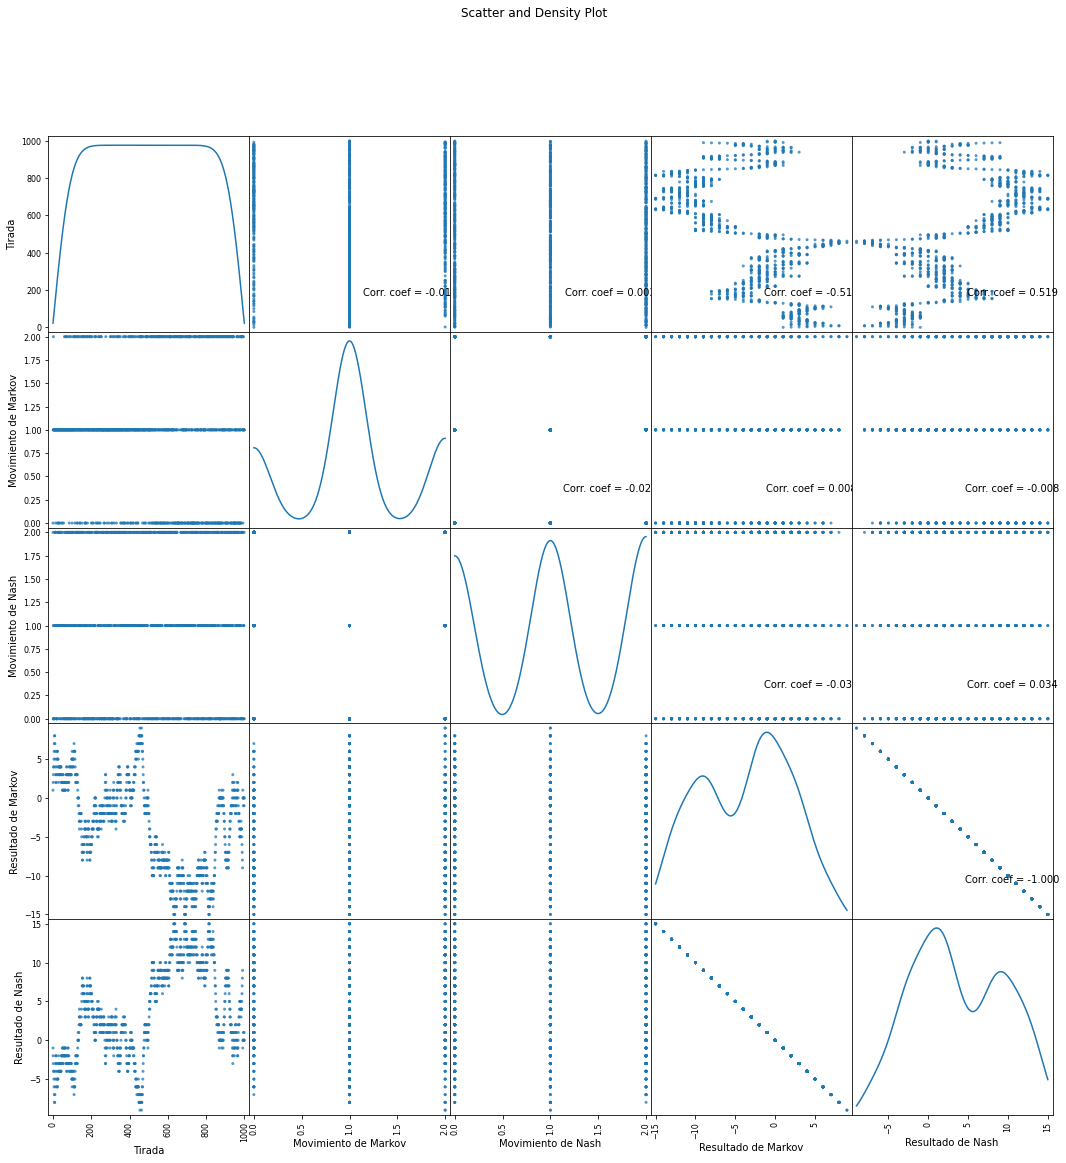

In [12]:
plotScatterMatrix(df1, 18, 10)

In [13]:
#DTW es una técnica utilizada para comparar dinámicamente datos de series de tiempo 
#cuando los índices de tiempo entre los puntos de datos de comparación no se sincronizan perfectamente.

#La coincidencia óptima se denota por la coincidencia que satisface todas las restricciones y reglas
#y que tiene el costo mínimo, donde el costo se calcula como la suma de las diferencias absolutas, 
#para cada par de índices coincidentes, entre sus valores.


import numpy as np

def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [14]:
df1['Movimiento de Markov'].value_counts()

1.0    534
2.0    247
0.0    219
Name: Movimiento de Markov, dtype: int64

In [15]:
df1['Movimiento de Nash'].value_counts()

2.0    347
1.0    340
0.0    313
Name: Movimiento de Nash, dtype: int64

In [16]:
M=[df1['Movimiento de Markov'].value_counts()[0],df1['Movimiento de Markov'].value_counts()[1],df1['Movimiento de Markov'].value_counts()[2]]

In [17]:
N=[df1['Movimiento de Nash'].value_counts()[0],df1['Movimiento de Nash'].value_counts()[1],df1['Movimiento de Nash'].value_counts()[2]]

In [18]:
dtw(M, N)

array([[  0.,  inf,  inf,  inf],
       [ inf,  94., 215., 343.],
       [ inf, 315., 288., 402.],
       [ inf, 381., 381., 388.]])